In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [4]:
##load the dataset to a pandas Dataframe
data=pd.read_csv("D:\project\creditcard.csv\creditcard.csv" , sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#checking the number of missing values in each column
data.isnull().values.sum()

np.int64(0)

This dataset is highly unbalanced
0--> Normal transaction
1--> fraudulent transaction

In [6]:
#separating the data for analysis
legit=data[data.Class == 0]
fraud=data[data.Class == 1]
fractional_value=len(fraud)/len(legit)
print(fractional_value)
print("fraud cases:{}".format(len(data[data["Class"]==1])))
print("legit transactions:{}".format(len(data[data["Class"]==0])))


0.0017304750013189597
fraud cases:492
legit transactions:284315


In [9]:
#statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

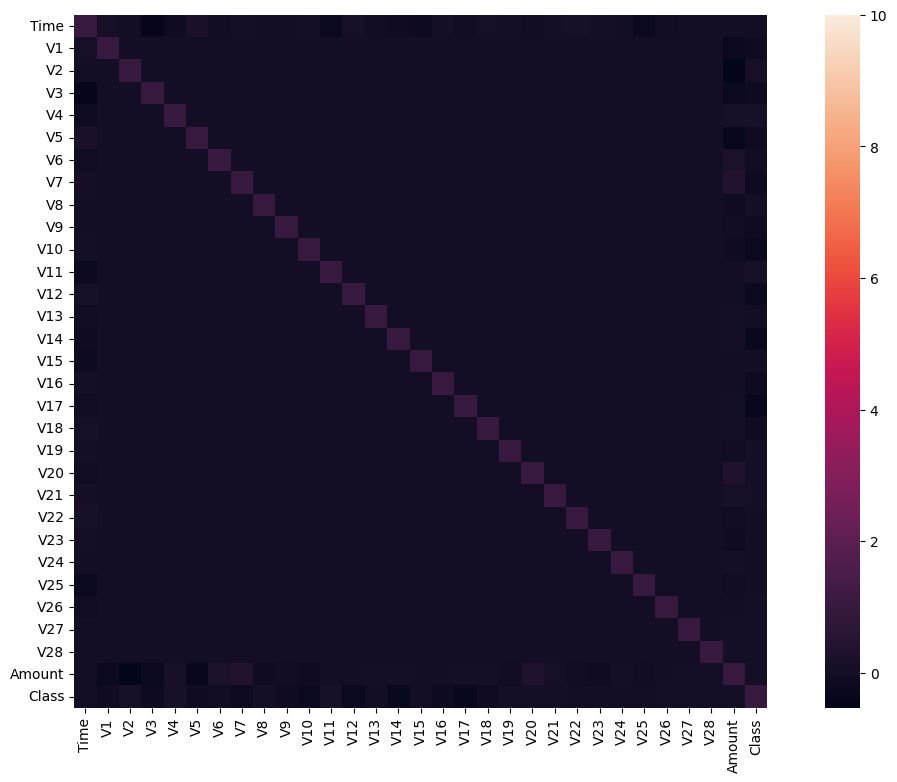

In [8]:
correlation=data.corr()
plotting=plt.figure(figsize=(15,9))
sns.heatmap(correlation,vmax=10, square=True)
plt.show()

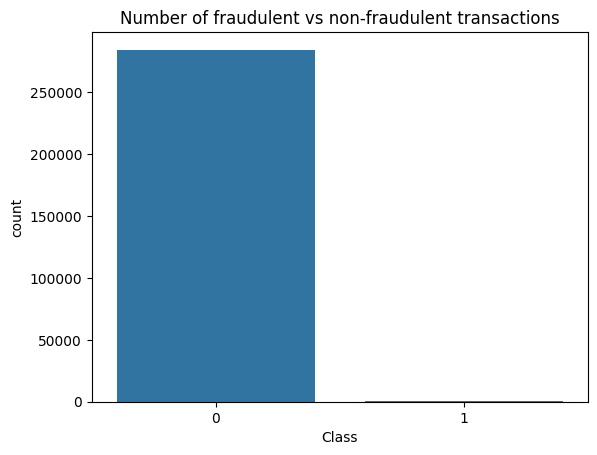

In [9]:
sns.countplot(x='Class',data=data)
plt.title("Number of fraudulent vs non-fraudulent transactions")
plt.show()

In [11]:
#splitting the data into features and targets
X=data.drop(columns=['Class', 'Time'])
Y=data['Class']
print(X.shape)
print(Y.shape)

(284807, 29)
(284807,)


In [12]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [13]:
#split the data into training  and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(284807, 29) (227845, 29) (56962, 29)


Model Training
Logistic Regression

In [14]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(X_train, Y_train)
Y_pred_log=model.predict(X_test)
print(f"the accuracy of the model is  {round(model.score(X_test,Y_test)*100,2)}%")

d:\MLFLOW1\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the accuracy of the model is  99.93%


In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred_log != Y_test).sum()
print("Model is used logistic regression ")

acc= accuracy_score(Y_test,Y_pred_log)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred_log)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred_log)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred_log)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred_log)
print("the matthews correlation coefficient is {}".format(mcc))

Model is used logistic regression 
The Accuracy is 0.9992626663389628
the precision is 0.85
the recall is 0.6938775510204082
the f1.score is 0.7640449438202247
the matthews correlation coefficient is 0.7676266657754605


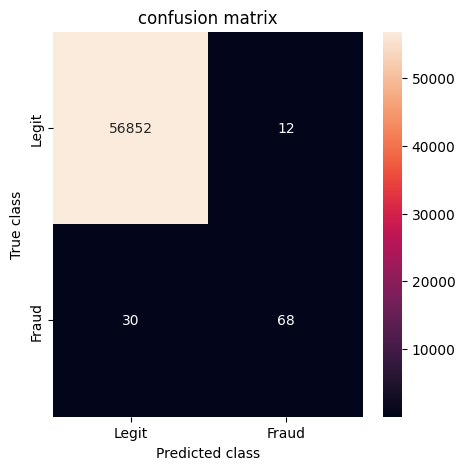

In [16]:
labels=["Legit","Fraud"]
conf_matrix=confusion_matrix(Y_test,Y_pred_log)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels=labels, annot=True,fmt="d");
plt.title("confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [16]:
#model evaluation
#accuracy score on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training Data : ', training_data_accuracy)

Accuracy on Training Data :  0.9993109350655051


In [17]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy score  on Test Data : ', test_data_accuracy)


Accuracy score  on Test Data :  0.9992626663389628


logistic regression with standard scalar

In [18]:
X=data.drop(columns=['Class', 'Time'])
Y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.69424232 -0.04407492  1.6727735  ...  0.33089162 -0.06378115
   0.24496426]
 [ 0.60849633  0.16117592  0.1097971  ... -0.02225568  0.04460752
  -0.34247454]
 [-0.69350046 -0.81157783  1.16946849 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 0.98002374 -0.18243372 -2.14320514 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [-0.12275539  0.32125034  0.46332013 ...  0.26960398  0.31668678
  -0.31324853]
 [-0.27233093 -0.11489898  0.46386564 ... -0.00598394  0.04134999
   0.51435531]]


In [19]:
scaler=StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print(X_train_scaled)

[[ 0.99337908 -0.45603659 -0.89405156 ...  0.19191152 -0.09910576
  -0.32249376]
 [ 1.03850725 -0.02934912 -2.01830171 ...  0.00639701 -0.21152423
  -0.33976388]
 [-0.50676613  0.36606499  0.4701143  ...  0.09413695  0.56642647
   0.34669349]
 ...
 [ 0.54569899  0.04401572  0.32793944 ...  0.07676455  0.07564817
  -0.17053266]
 [ 0.65325241  0.18256566  0.22004215 ... -0.14759091 -0.0184768
  -0.34813969]
 [-0.30573748  0.47027277  1.2035838  ...  0.93509494  0.63073809
  -0.32380996]]


In [20]:
print(X_test_scaled)

[[-0.34471083  0.85416023 -0.73269126 ...  1.31850867  0.89058207
  -0.25995439]
 [-1.44498471 -1.67648235  1.67504412 ...  0.27380388 -1.56632492
  -0.30442595]
 [-1.82615312  1.40617205  0.86278481 ...  1.36437772  1.55873319
  -0.04828573]
 ...
 [-0.53525491  0.41575818  0.12924265 ...  0.04301426  0.44344588
  -0.28631824]
 [ 1.10222743 -0.65718284 -0.56651657 ... -0.00616097 -0.17410048
  -0.27211925]
 [ 0.62649961 -0.36552499  0.16307491 ...  0.06140638  0.1529954
  -0.11277946]]


In [21]:
print(pd.Series(Y_train).value_counts(normalize=True))

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64


In [22]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)
print(f'Balanced dataset shape: {np.bincount(Y_resampled)}')

d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Balanced dataset shape: [284315 284315]


In [23]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Model Training with Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# Model Evaluation
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred_test != Y_test).sum()
print("Model is used logistic regression with standard scalar ")

acc= accuracy_score(Y_test,Y_pred_test)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred_test)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred_test)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred_test)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred_test)
print("the matthews correlation coefficient is {}".format(mcc))

Model is used logistic regression with standard scalar 
The Accuracy is 0.9471185129170111
the precision is 0.9737654320987654
the recall is 0.919211597865768
the f1.score is 0.9457024196460816
the matthews correlation coefficient is 0.8956603853130398


Random forest classification

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred=rfc.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred != Y_test).sum()
print("Model is used Random Forest Classifier ")

acc= accuracy_score(Y_test,Y_pred)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred)
print("the matthews correlation coefficient is {}".format(mcc))


Model is used Random Forest Classifier 
The Accuracy is 0.9998768971035648
the precision is 0.9997543428671697
the recall is 1.0
the f1.score is 0.9998771563448748
the matthews correlation coefficient is 0.9997538234158287


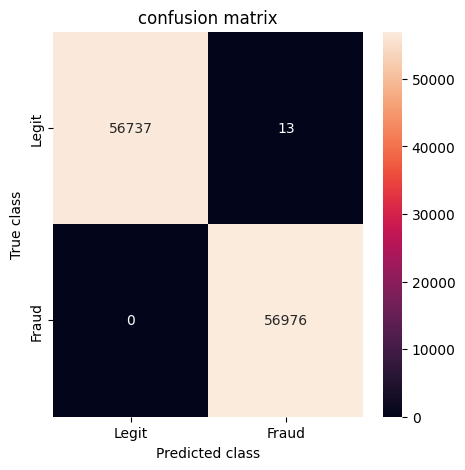

In [27]:
labels=["Legit","Fraud"]
conf_matrix=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels=labels, annot=True,fmt="d");
plt.title("confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

Random forest classifier with standard scalar

In [26]:
# Data Balancing with SMOTE
X=data.drop(columns=['Class', 'Time'])
Y = data['Class']

scaler = StandardScaler()
X_scaled_rfc = scaler.fit_transform(X)
print(X_scaled_rfc)


[[-0.69424232 -0.04407492  1.6727735  ...  0.33089162 -0.06378115
   0.24496426]
 [ 0.60849633  0.16117592  0.1097971  ... -0.02225568  0.04460752
  -0.34247454]
 [-0.69350046 -0.81157783  1.16946849 ... -0.13713686 -0.18102083
   1.16068593]
 ...
 [ 0.98002374 -0.18243372 -2.14320514 ...  0.01103672 -0.0804672
  -0.0818393 ]
 [-0.12275539  0.32125034  0.46332013 ...  0.26960398  0.31668678
  -0.31324853]
 [-0.27233093 -0.11489898  0.46386564 ... -0.00598394  0.04134999
   0.51435531]]


In [27]:
scaler=StandardScaler()
X_train_scaled_rfc= scaler.fit_transform(X_train)
X_test_scaled_rfc=scaler.transform(X_test)
print(X_train_scaled_rfc)

[[ 0.1053704   0.07746731  0.0328437  ...  0.21816244  0.78914978
  -0.38932359]
 [-0.26331796  0.8200425  -0.85004135 ... -0.11956377 -1.67470547
  -0.12455412]
 [ 0.45299389  0.02839187 -0.19962029 ...  0.79387705  0.91423428
  -0.23343778]
 ...
 [-0.59256331 -0.33544908 -0.43370811 ...  1.50180024  0.78142773
  -0.41462654]
 [ 0.39426758 -0.23487398  0.80783131 ... -0.21855659 -0.565638
  -0.40183312]
 [ 0.64702196 -0.72505505  0.62377757 ... -0.09314033 -0.01620453
   0.07274194]]


In [28]:
print(X_test_scaled_rfc)

[[ 0.5326083  -0.18541146 -0.27015174 ...  0.78048408  0.73270764
  -0.19959213]
 [ 0.13561448  0.15945062  0.06935758 ...  0.43215456  0.38664267
  -0.28575094]
 [ 0.2650523  -0.25069864  0.91516753 ... -0.09470638 -0.39923971
  -0.28612662]
 ...
 [ 0.39263346 -0.24516966  0.59322941 ... -0.13337526 -0.12606314
  -0.3014208 ]
 [-0.81477163  0.03827477 -0.68692887 ...  1.22937259  0.37776851
  -0.0805592 ]
 [ 0.80142361 -0.48665717  0.2290435  ... -0.10304743 -0.19780779
  -0.34696065]]


In [29]:
print(pd.Series(Y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


In [30]:
smote = SMOTE(random_state=42)
X_resampled_rfc, Y_resampled_rfc = smote.fit_resample(X_scaled, Y)
print(f'Balanced dataset shape: {np.bincount(Y_resampled_rfc)}')

d:\MLFLOW1\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Balanced dataset shape: [284315 284315]


In [31]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled_rfc, Y_resampled_rfc, test_size=0.2, random_state=42)

# Model Training with Logistic Regression
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, Y_train)

# Model Evaluation
Y_pred_train_rfc = model_rfc.predict(X_train)
Y_pred_test_rfc = model_rfc.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
n_outliers=len(fraud)
n_errors=(Y_pred_test_rfc != Y_test).sum()
print("Model is used Random Forest Classifier with standard scalar ")

acc= accuracy_score(Y_test,Y_pred_test_rfc)
print("The Accuracy is {}".format(acc))

pred=precision_score(Y_test,Y_pred_test_rfc)
print("the precision is {}".format(pred))

rec=recall_score(Y_test,Y_pred_test_rfc)
print("the recall is {}".format(rec))

f1=f1_score(Y_test,Y_pred_test_rfc)
print("the f1.score is {}".format(f1))

mcc=matthews_corrcoef(Y_test,Y_pred_test_rfc)
print("the matthews correlation coefficient is {}".format(mcc))

Model is used Random Forest Classifier with standard scalar 
The Accuracy is 0.9998768971035648
the precision is 0.9997543428671697
the recall is 1.0
the f1.score is 0.9998771563448748
the matthews correlation coefficient is 0.9997538234158287


Advanced Model 

In [32]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    print(f'--- {model_name} Evaluation ---')
    print(f'Accuracy: {accuracy_score(Y_test, Y_pred):.2f}')
    print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))
    print('Classification Report:', classification_report(Y_test, Y_pred))
    print(f'ROC AUC Score: {roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]):.2f}')

Training Logistic Regression...
--- Logistic Regression Evaluation ---
Accuracy: 0.95
Confusion Matrix: [[55339  1411]
 [ 4603 52373]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC AUC Score: 0.99
Training Random Forest...
--- Random Forest Evaluation ---
Accuracy: 1.00
Confusion Matrix: [[56738    12]
 [    0 56976]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score: 1.00
Tr

d:\MLFLOW1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [21:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost Evaluation ---
Accuracy: 1.00
Confusion Matrix: [[56715    35]
 [    1 56975]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score: 1.00


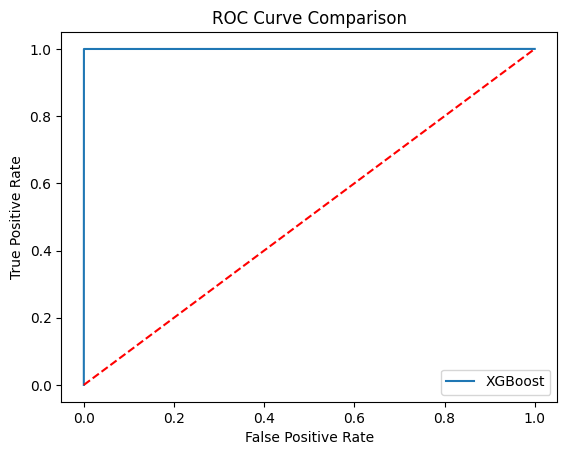

In [55]:
    # ROC Curve
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Convert to DataFrame if needed
X_train_df = pd.DataFrame(X_train, columns=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                                            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                                            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

# Create DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': X_train_data.columns, 'Importance': importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_df)


NameError: name 'importance' is not defined

In [34]:
feature_names = data.drop(columns=['Class']).columns  # Exclude the target column
print(feature_names)



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [38]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
print("file was successfully created")
import os
print("Current Directory:", os.getcwd())


file was successfully created
Current Directory: d:\


In [39]:
model1=pickle.load(open('model.pkl','rb'))

In [41]:
print(model1.predict( [[-5.5 ,	-2.3,	3.4,	-4.2,	2.1]]
))

ValueError: Feature shape mismatch, expected: 29, got 5

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("D:\project\creditcard.csv\creditcard.csv" )

# Select only the important features
selected_features = ['V14', 'V10', 'V4', 'V11', 'V12', 'Class']
df = df[selected_features]

# Split into features (X) and target (y)
X = df.drop(columns=['Class'])
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(" Model Trained Successfully!")
print(f" Accuracy: {accuracy}")
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" F1 Score: {f1}")


d:\MLFLOW1\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [21:15:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Model Trained Successfully!
 Accuracy: 0.999403110845827
 Precision: 0.8809523809523809
 Recall: 0.7551020408163265
 F1 Score: 0.8131868131868132


In [33]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
print("file was successfully created")
import os
print("Current Directory:", os.getcwd())

file was successfully created
Current Directory: d:\


In [ ]:
import numpy as np

# Example fraudulent data point (replace with actual fraudulent values)
fraud_sample = np.array([[V14_value, "V10_value", "V4_value", "V11_value", "V12_value"]])

# Scale the input
scaled_sample = scaler.transform(fraud_sample)

# Make a prediction
prediction = model_xgb.predict(scaled_sample)

print("Prediction:", "Fraudulent" if prediction[0] == 1 else "Legitimate")


ValueError: could not convert string to float: np.str_('V14_value')